# Inventário de arquivos

In [1]:
import os
import env

filepaths = [os.path.join(env.folder, f) for f in os.listdir(env.folder)]

In [2]:
filepaths = [f.path for f in os.scandir(env.folder) if f.is_file()]
dirpaths  = [f.path for f in os.scandir(env.folder) if f.is_dir()]

In [3]:
os.stat(env.folder)

os.stat_result(st_mode=16895, st_ino=6434225158214210074, st_dev=162, st_nlink=1, st_uid=0, st_gid=0, st_size=0, st_atime=1578516086, st_mtime=1578496689, st_ctime=1492112447)

In [4]:
import folderstats
import env

In [5]:
#df = folderstats.folderstats("\\\\?\\K:\\Interno", hash_name='md5', ignore_hidden=True)
df = folderstats.folderstats("\\\\?\\K:\\Interno", hash_name='md5', ignore_hidden=True)
df

FileNotFoundError: [WinError 2] O sistema não pode encontrar o arquivo especificado: '\\\\?\\K:\\Interno\\Acervo_Dados\\Acervo_Geoinfo\\EMBRAESP - Atalho.lnk'

In [ ]:
df.to_csv(r'csv/geoinfo_nas_folder_md5.csv')

In [2]:
import pandas as pd
df = pd.read_csv(r'csv/geoinfo_nas_folder.csv')

In [9]:
df['extension'] = df['extension'].str.lower()

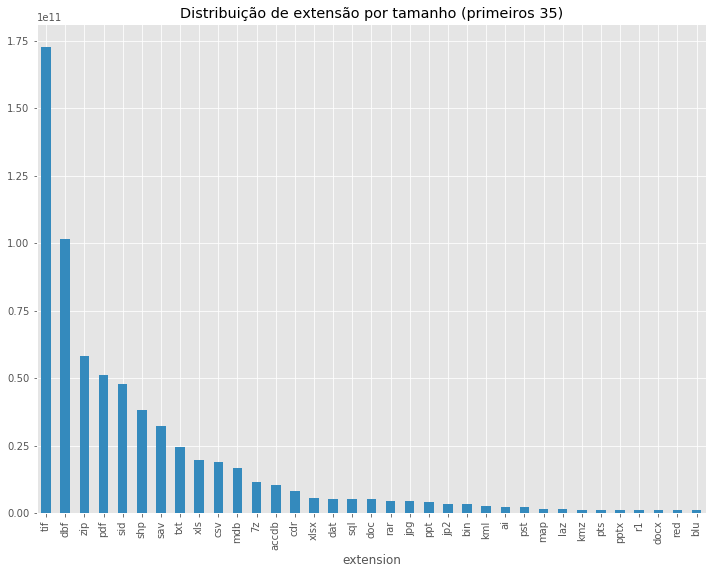

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))

with plt.style.context('ggplot'):
    # Group by extension and sum all sizes for each extension 
    extension_sizes = df.groupby('extension')['size'].sum()
    # Sort elements by size
    extension_sizes = extension_sizes.sort_values(ascending=False)
    
    
    extension_sizes.head(35).plot(
        kind='bar', color='C1', title='Distribuição de extensão por tamanho (primeiros 35)');


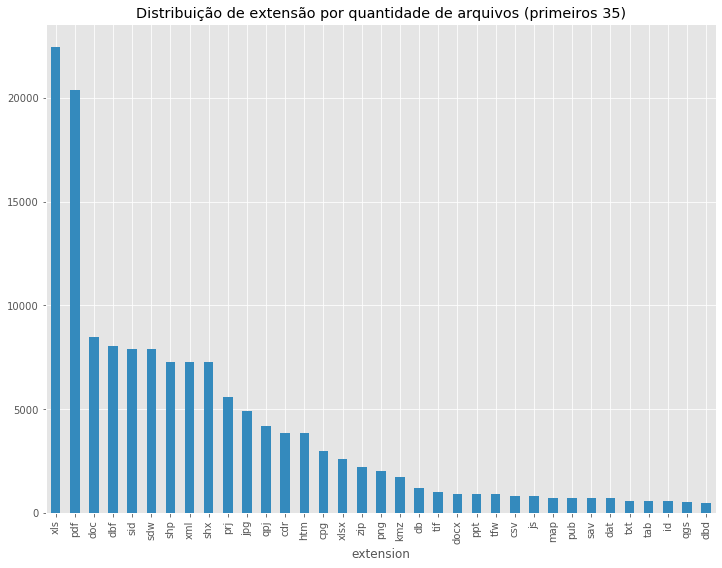

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))

with plt.style.context('ggplot'):
    # Group by extension and sum all sizes for each extension 
    extension_sizes = df.groupby('extension')['size'].count()
    # Sort elements by size
    extension_sizes = extension_sizes.sort_values(ascending=False)
    
    
    extension_sizes.head(35).plot(
        kind='bar', color='C1', title='Distribuição de extensão por quantidade de arquivos (primeiros 35)');

In [21]:
extension_sizes.head(15)

extension
xls    22443
pdf    20357
doc     8465
dbf     8024
sid     7887
sdw     7878
shp     7299
xml     7282
shx     7268
prj     5593
jpg     4905
qpj     4208
cdr     3853
htm     3844
cpg     2971
Name: size, dtype: int64

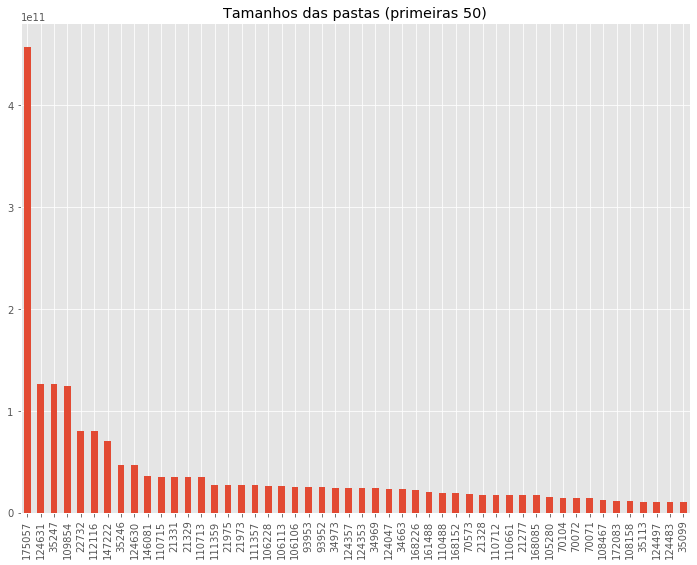

In [17]:
plt.figure(figsize=(12,9))

with plt.style.context('ggplot'):
    # Filter the data set to only folders
    df_folders = df[df['folder']]
    # Set the name to be the index (so we can use it as a label later)
    
    #df_folders.set_index('name', inplace=True)
    
    # Sort the folders by size
    df_folders = df_folders.sort_values(by='size', ascending=False)
    
    # Show the size of the largest 50 folders as a bar plot
    df_folders['size'][:50].plot(kind='bar', color='C0', title='Tamanhos das pastas (primeiras 50)');


In [11]:
# quantidade de arquivos
qt_arquivos = df.loc[df.folder != True]
print(qt_arquivos.count())

# quantidade de pastas
qt_folders = df.loc[df.folder == True]
print(qt_folders.count())

# quantidades de arquivos únicos


Unnamed: 0    160325
id            160325
path          160325
name          160325
extension     157511
size          160325
atime         160325
mtime         160325
ctime         160325
folder        160325
num_files          0
depth         160325
parent        160325
uid           160325
dtype: int64
Unnamed: 0    14733
id            14733
path          14733
name          14730
extension         0
size          14733
atime         14733
mtime         14733
ctime         14733
folder        14733
num_files     14733
depth         14733
parent        14733
uid           14733
dtype: int64


In [12]:
import networkx as nx

# Sort the index
df_sorted = df.sort_values(by='id')

G = nx.Graph()
for i, row in df_sorted.iterrows():
    if row.parent:
        G.add_edge(row.id, row.parent)
    
# Print some additional information
print(nx.info(G))


Name: 
Type: Graph
Number of nodes: 118766
Number of edges: 132925
Average degree:   2.2384


In [14]:
from networkx.drawing.nx_pydot import graphviz_layout

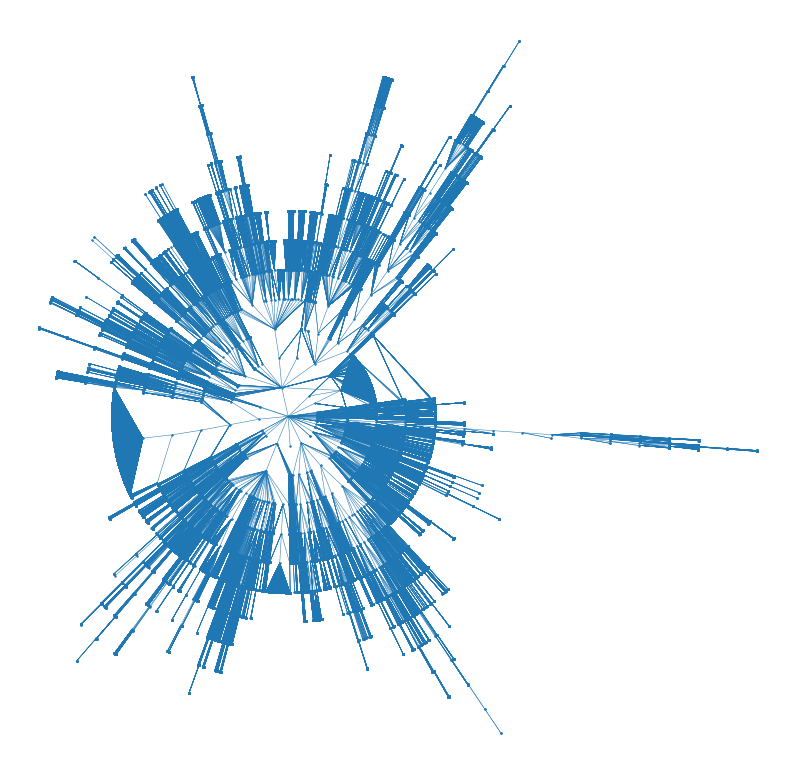

In [16]:
pos_twopi = graphviz_layout(G, prog='twopi', root=1)

fig = plt.figure(figsize=(14, 14))
nodes = nx.draw_networkx_nodes(G, pos_twopi, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_twopi, edge_color='C0', width=0.5)
plt.axis('off')
plt.axis('equal');
